### Clustering Big Data with PySpark

**Association Rules**

Association Rule Mining is a technique in unsupervised learning used to discover interesting relationships, patterns, or associations among a set of items in large datasets. It is widely used in market basket analysis, where the goal is to understand the purchasing behavior of customers by identifying items that are frequently bought together.

For example, it might reveal that customers who buy bread are also likely to buy butter.

**The FP-Growth (Frequent Pattern Growth)**

The FP-Growth (Frequent Pattern Growth) algorithm is an efficient and scalable method for mining frequent itemsets and discovering association rules from large datasets.

It's widely used for market basket analysis, where it identifies items that frequently occur together in transactions.

#### **Association Rules: PySpark with FP-Growth**



In [1]:
from pyspark.sql import SparkSession
from pyspark.ml.fpm import FPGrowth

# Step 1: Initialize Spark session
spark = SparkSession.builder.appName("AssociationRulesExample").getOrCreate()

In [2]:
data = [
    (0, ["milk", "bread", "cereal"]),
    (1, ["milk", "bread", "sugar", "eggs"]),
    (2, ["milk", "bread", "butter"]),
    (3, ["sugar", "eggs"])
]
df = spark.createDataFrame(data, ["id", "items"])
df.show()

+---+--------------------+
| id|               items|
+---+--------------------+
|  0|[milk, bread, cer...|
|  1|[milk, bread, sug...|
|  2|[milk, bread, but...|
|  3|       [sugar, eggs]|
+---+--------------------+



In [3]:
# Step 3: Fit FP-Growth model
fp_growth = FPGrowth(itemsCol="items", minSupport=0.5, minConfidence=0.6)
model = fp_growth.fit(df)

In [4]:
# Step 4: Display frequent itemsets
print("Frequent Itemsets:")
model.freqItemsets.show()

Frequent Itemsets:
+-------------+----+
|        items|freq|
+-------------+----+
|      [sugar]|   2|
|      [bread]|   3|
|       [milk]|   3|
|[milk, bread]|   3|
|       [eggs]|   2|
|[eggs, sugar]|   2|
+-------------+----+



In [5]:
# Step 5: Display association rules
print("Association Rules:")
model.associationRules.show()

Association Rules:
+----------+----------+----------+------------------+-------+
|antecedent|consequent|confidence|              lift|support|
+----------+----------+----------+------------------+-------+
|    [milk]|   [bread]|       1.0|1.3333333333333333|   0.75|
|   [sugar]|    [eggs]|       1.0|               2.0|    0.5|
|   [bread]|    [milk]|       1.0|1.3333333333333333|   0.75|
|    [eggs]|   [sugar]|       1.0|               2.0|    0.5|
+----------+----------+----------+------------------+-------+



Rule: [milk] → [bread] (Confidence = 1.0)
- Interpretation: Every transaction that contains milk also contains bread (100% confidence).
- Lift = 1.33: This means that the presence of milk increases the likelihood of bread being bought by 1.33 times.

Rule: [sugar] → [eggs] (Confidence = 1.0)
- Interpretation: Every transaction that contains sugar also contains eggs (100% confidence).
- Lift = 2.0: The presence of sugar doubles the chance of buying eggs.

Rule: [bread] → [milk] (Confidence = 1.0)
- Interpretation: Every transaction that contains bread also contains milk.
- Lift = 1.33: The presence of bread increases the likelihood of buying milk.

Rule: [eggs] → [sugar] (Confidence = 1.0)
- Interpretation: Every transaction that contains eggs also contains sugar.
- Lift = 2.0: The presence of eggs doubles the chance of buying sugar.

In [6]:
# sample dataset for model prediction
data = [
    (0, ["milk", "bread", "butter"]),
    (1, ["bread", "butter"]),
    (2, ["milk", "bread", "jam"]),
    (3, ["bread", "butter", "jam"]),
    (4, ["milk", "butter"])
]
df = spark.createDataFrame(data, ["id", "items"])
df.show()

+---+--------------------+
| id|               items|
+---+--------------------+
|  0|[milk, bread, but...|
|  1|     [bread, butter]|
|  2|  [milk, bread, jam]|
|  3|[bread, butter, jam]|
|  4|      [milk, butter]|
+---+--------------------+



In [7]:
# Step 6: Display predictions
print("Prediction for Transactions:")
model.transform(df).show()

Prediction for Transactions:
+---+--------------------+----------+
| id|               items|prediction|
+---+--------------------+----------+
|  0|[milk, bread, but...|        []|
|  1|     [bread, butter]|    [milk]|
|  2|  [milk, bread, jam]|        []|
|  3|[bread, butter, jam]|    [milk]|
|  4|      [milk, butter]|   [bread]|
+---+--------------------+----------+



In [8]:
# Stop Spark session
spark.stop()

#### K-Means Clustering

**Clustering**

Clustering is a type of unsupervised machine learning technique used to group similar data points into distinct clusters based on their inherent characteristics.

**Centroid-Based Clustering**

Example: K-Means Clustering

Groups data points into K clusters based on their features. The algorithm minimizes the distance between the data points and the centroid of their assigned clusters.



**Euclidean Distance**

Euclidean distance measures the straight-line distance between two points in a multidimensional space. It is one of the most commonly used distance metrics in clustering algorithms, such as K-Means, where it is used to determine the distance between data points and centroids.

Suppose we have two points in 2D space:

Point A is (3,4)

Point B is (7,1)

d = √(7-3)2+(1-4)2 = 5

In [9]:
from pyspark.sql import SparkSession
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt

In [10]:
spark = SparkSession.builder.appName("K Means Clustering from Example").getOrCreate()

In [11]:
data = [
    (1, 1.0, 1.0),
    (2, 2.0, 1.0),
    (3, 4.0, 3.0),
    (4, 5.0, 4.0),
    (5, 3.0, 2.0),
    (6, 4.0, 4.0)
]
df = spark.createDataFrame(data, ["id", "x", "y"])
df.show()

+---+---+---+
| id|  x|  y|
+---+---+---+
|  1|1.0|1.0|
|  2|2.0|1.0|
|  3|4.0|3.0|
|  4|5.0|4.0|
|  5|3.0|2.0|
|  6|4.0|4.0|
+---+---+---+



**Data Format for MLlib**

![compare](Img/SupUnsup.png)

Assemble features

In [12]:
assembler = VectorAssembler(inputCols=["x", "y"], outputCol="features")
df_transformed = assembler.transform(df)
df_transformed.show()

+---+---+---+---------+
| id|  x|  y| features|
+---+---+---+---------+
|  1|1.0|1.0|[1.0,1.0]|
|  2|2.0|1.0|[2.0,1.0]|
|  3|4.0|3.0|[4.0,3.0]|
|  4|5.0|4.0|[5.0,4.0]|
|  5|3.0|2.0|[3.0,2.0]|
|  6|4.0|4.0|[4.0,4.0]|
+---+---+---+---------+



Apply K-Means

In [13]:
kmeans = KMeans().setK(2).setSeed(42).setFeaturesCol("features")
model = kmeans.fit(df_transformed)

In [14]:
centers = model.clusterCenters()
print(centers)
print("Cluster Centers:")
for center in centers:
    print(center)

[array([2.        , 1.33333333]), array([4.33333333, 3.66666667])]
Cluster Centers:
[2.         1.33333333]
[4.33333333 3.66666667]


Display Cluster Assignments

In [15]:
result_df = model.transform(df_transformed)
result_df.select("id", "x", "y", "prediction").show()

+---+---+---+----------+
| id|  x|  y|prediction|
+---+---+---+----------+
|  1|1.0|1.0|         0|
|  2|2.0|1.0|         0|
|  3|4.0|3.0|         1|
|  4|5.0|4.0|         1|
|  5|3.0|2.0|         0|
|  6|4.0|4.0|         1|
+---+---+---+----------+



**Within-Cluster Sum of Squares (WCSS)**

The Sum of Squared Errors (SSE), also known as Within-Cluster Sum of Squares (WCSS), measures the compactness of the clusters formed by K-Means.

It indicates how close the data points are to their cluster centroids.

In [16]:
sse = model.summary.trainingCost
print(f"Sum of Squared Errors (SSE): {sse}")

Sum of Squared Errors (SSE): 4.000000000000001


**Visualization**

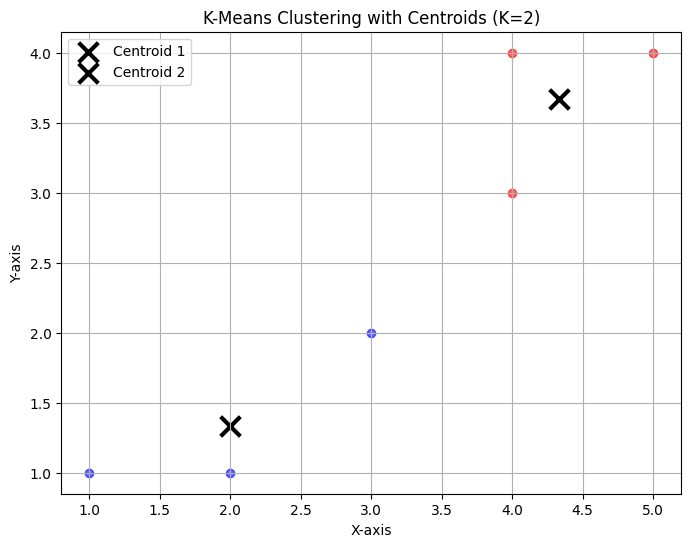

In [33]:
import numpy as np

x_rows = result_df.select('x').collect()
x = np.array([row['x'] for row in x_rows])
y_rows = result_df.select('y').collect()
y = np.array([row['y'] for row in y_rows])
prediction_rows = result_df.select('prediction').collect()
predictions = np.array([row['prediction'] for row in prediction_rows])

plt.figure(figsize=(8, 6))
colors = ['blue', 'red']
for i in range(len(x)):
    plt.scatter(x[i], y[i], color=colors[predictions[i]], alpha=0.6)
for i, center in enumerate(centers):
    plt.scatter(center[0], center[1], marker='x', color='black', s=200, linewidths=3, label=f'Centroid {i+1}')
plt.title('K-Means Clustering with Centroids (K=2)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()

In [34]:
# Stop the Spark session
spark.stop()

#### The Elbow Method

The Elbow Method is a technique used to determine the optimal number of clusters (K) in K-Means clustering.
How the Elbow Method Works:
1. Perform K-Means clustering for a range of K values (e.g., K=1 to K=10).
2. Calculate the SSE for each K.
3. Plot K against the SSE values.
4. Identify the "elbow point," where the rate of decrease in SSE slows down significantly.


**Seeds Dataset**

Goal: Identifying natural groups of wheat kernels based on measurements. (n = 210 samples)
- area: The area of the wheat kernel.
- perimeter: The perimeter of the wheat kernel.
- compactness: A measure calculated as 4π×Area/Perimeter^2
- length_of_kernel: The length of the wheat kernel.
- width_of_kernel: The width of the wheat kernel.
- asymmetry_coefficient: A measure of asymmetry in the shape of the wheat kernel.
- length_of_groove: The length of the kernel groove.

This dataset is often used for clustering and classification problems to distinguish between different types of wheat kernels.

There are three different wheat varieties represented in the dataset: Kama, Rosa, Canadian

In the context of big data, clustering becomes challenging due to the high-dimensionality of the data, such as having 7 dimensions.
- The distance between points becomes less meaningful, as almost all points are equidistant from each other.
- High-dimensional data increases the time and resources required for clustering algorithms to find optimal clusters.
- Humans can only visually interpret data in 2D or 3D.
- Understanding and interpreting clusters in high-dimensional space is more complex.


In [35]:
import pandas as pd

In [36]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Seeds Dataset Clustering").getOrCreate()

In [37]:
url = "https://github.com/oakabc/DEA/raw/main/11%20-%20Clustering/seeds_dataset.csv"
pandas_df = pd.read_csv(url)
dataset = spark.createDataFrame(pandas_df)
dataset.show()
dataset.printSchema()

+-----+---------+-----------+-----------------+---------------+---------------------+-----------------+
| area|perimeter|compactness| length_of_kernel|width_of_kernel|asymmetry_coefficient| length_of_groove|
+-----+---------+-----------+-----------------+---------------+---------------------+-----------------+
|15.26|    14.84|      0.871|            5.763|          3.312|                2.221|             5.22|
|14.88|    14.57|     0.8811|5.553999999999999|          3.333|                1.018|            4.956|
|14.29|    14.09|      0.905|            5.291|          3.337|                2.699|            4.825|
|13.84|    13.94|     0.8955|            5.324|          3.379|                2.259|            4.805|
|16.14|    14.99|     0.9034|            5.658|          3.562|                1.355|            5.175|
|14.38|    14.21|     0.8951|            5.386|          3.312|                2.462|            4.956|
|14.69|    14.49|     0.8799|            5.563|          3.259| 

In [38]:
dataset.head(1)

[Row(area=15.26, perimeter=14.84, compactness=0.871, length_of_kernel=5.763, width_of_kernel=3.312, asymmetry_coefficient=2.221, length_of_groove=5.22)]

In [39]:
dataset.columns

['area',
 'perimeter',
 'compactness',
 'length_of_kernel',
 'width_of_kernel',
 'asymmetry_coefficient',
 'length_of_groove']

In [40]:
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=dataset.columns, outputCol='features')
final_data = assembler.transform(dataset)
final_data.printSchema()

root
 |-- area: double (nullable = true)
 |-- perimeter: double (nullable = true)
 |-- compactness: double (nullable = true)
 |-- length_of_kernel: double (nullable = true)
 |-- width_of_kernel: double (nullable = true)
 |-- asymmetry_coefficient: double (nullable = true)
 |-- length_of_groove: double (nullable = true)
 |-- features: vector (nullable = true)



**Problem with scales in seeds dataset**

In the Seeds dataset, some features have larger ranges (e.g., area and perimeter) while others have smaller ranges (e.g., compactness).

When these features are combined into a single dataset, features with larger values dominate the results of distance-based algorithms (e.g., K-Means clustering).

**Standardization**, often performed using StandardScaler, transforms the features in the dataset such that they have a mean of 0 and a standard deviation of 1.

With Standardization: Both features have equal weight, leading to more balanced and meaningful clusters.

In [41]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')
scaler_model = scaler.fit(final_data)
final_data = scaler_model.transform(final_data)
final_data.head(2)

[Row(area=15.26, perimeter=14.84, compactness=0.871, length_of_kernel=5.763, width_of_kernel=3.312, asymmetry_coefficient=2.221, length_of_groove=5.22, features=DenseVector([15.26, 14.84, 0.871, 5.763, 3.312, 2.221, 5.22]), scaledFeatures=DenseVector([5.2445, 11.3633, 36.8608, 13.0072, 8.7685, 1.4772, 10.621])),
 Row(area=14.88, perimeter=14.57, compactness=0.8811, length_of_kernel=5.553999999999999, width_of_kernel=3.333, asymmetry_coefficient=1.018, length_of_groove=4.956, features=DenseVector([14.88, 14.57, 0.8811, 5.554, 3.333, 1.018, 4.956]), scaledFeatures=DenseVector([5.1139, 11.1566, 37.2883, 12.5354, 8.8241, 0.6771, 10.0838]))]

Apply K-Means

In [42]:
from pyspark.ml.clustering import KMeans
kmeans = KMeans(k=3, featuresCol='scaledFeatures') # Why K = 3 ? <- domain knowledge
model = kmeans.fit(final_data)

Display SSE


In [43]:
print("SSE:",model.summary.trainingCost)

SSE: 428.60820118724365


Display centroids

In [44]:
centers = model.clusterCenters()
print(centers)

for center in centers:
    print(center)

[array([ 4.07497225, 10.14410142, 35.89816849, 11.80812742,  7.54416916,
        3.15410901, 10.38031464]), array([ 6.35645488, 12.40730852, 37.41990178, 13.93860446,  9.7892399 ,
        2.41585013, 12.29286107]), array([ 4.96198582, 10.97871333, 37.30930808, 12.44647267,  8.62880781,
        1.80061978, 10.41913733])]
[ 4.07497225 10.14410142 35.89816849 11.80812742  7.54416916  3.15410901
 10.38031464]
[ 6.35645488 12.40730852 37.41990178 13.93860446  9.7892399   2.41585013
 12.29286107]
[ 4.96198582 10.97871333 37.30930808 12.44647267  8.62880781  1.80061978
 10.41913733]


Display cluster predictions for each data point

In [45]:
model.transform(final_data).show()

+-----+---------+-----------+-----------------+---------------+---------------------+-----------------+--------------------+--------------------+----------+
| area|perimeter|compactness| length_of_kernel|width_of_kernel|asymmetry_coefficient| length_of_groove|            features|      scaledFeatures|prediction|
+-----+---------+-----------+-----------------+---------------+---------------------+-----------------+--------------------+--------------------+----------+
|15.26|    14.84|      0.871|            5.763|          3.312|                2.221|             5.22|[15.26,14.84,0.87...|[5.24452795332029...|         2|
|14.88|    14.57|     0.8811|5.553999999999999|          3.333|                1.018|            4.956|[14.88,14.57,0.88...|[5.11393027165176...|         2|
|14.29|    14.09|      0.905|            5.291|          3.337|                2.699|            4.825|[14.29,14.09,0.90...|[4.91116018695589...|         2|
|13.84|    13.94|     0.8955|            5.324|          3

Count and Group based on clusters

In [46]:
predicted_df = model.transform(final_data)
from pyspark.sql import functions as F
# Group by the 'prediction' column and count the occurrences
grouped_df = predicted_df.groupBy("prediction").count()
# Show the result
grouped_df.show()

+----------+-----+
|prediction|count|
+----------+-----+
|         1|   67|
|         2|   71|
|         0|   72|
+----------+-----+



##### **Correlation Matrix**

A correlation matrix is a table that shows the correlation coefficients between multiple variables in a dataset. Each cell in the table represents the correlation between two variables.

It shows how strongly two variables are related. The correlation values range from:

-1: Perfect negative correlation (when one variable increases, the other decreases)

0: No correlation (the variables are not related)

+1: Perfect positive correlation (when one variable increases, the other increases too)


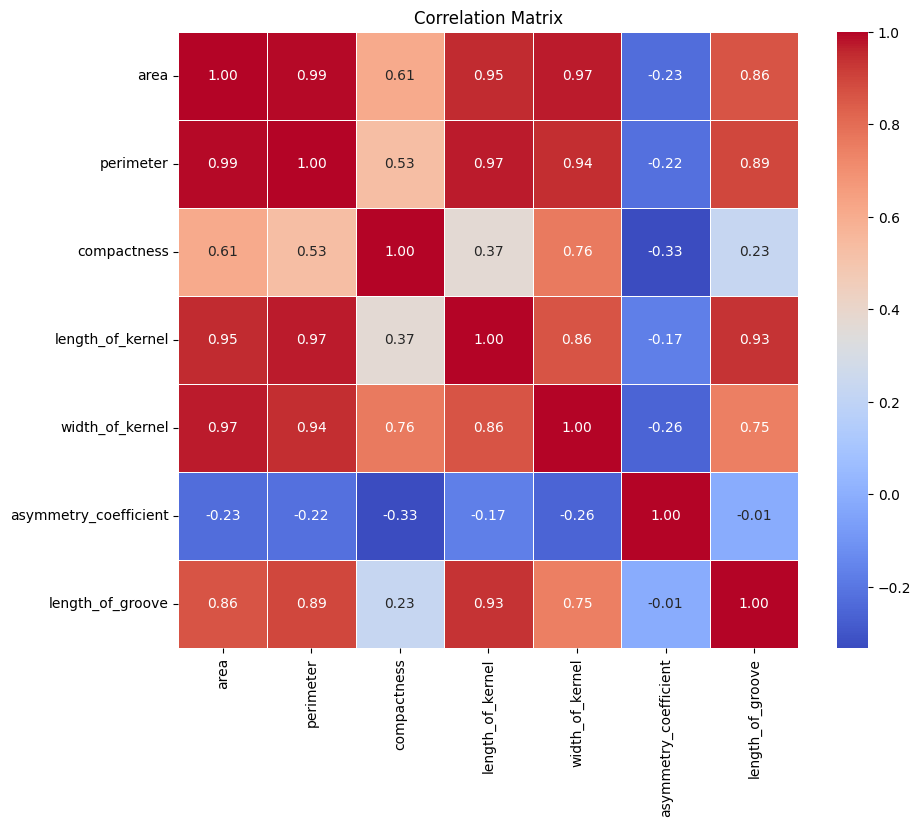

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.DataFrame(pandas_df)
# Calculate the correlation matrix
correlation_matrix = df.corr()
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

##### **Create the pairplot**

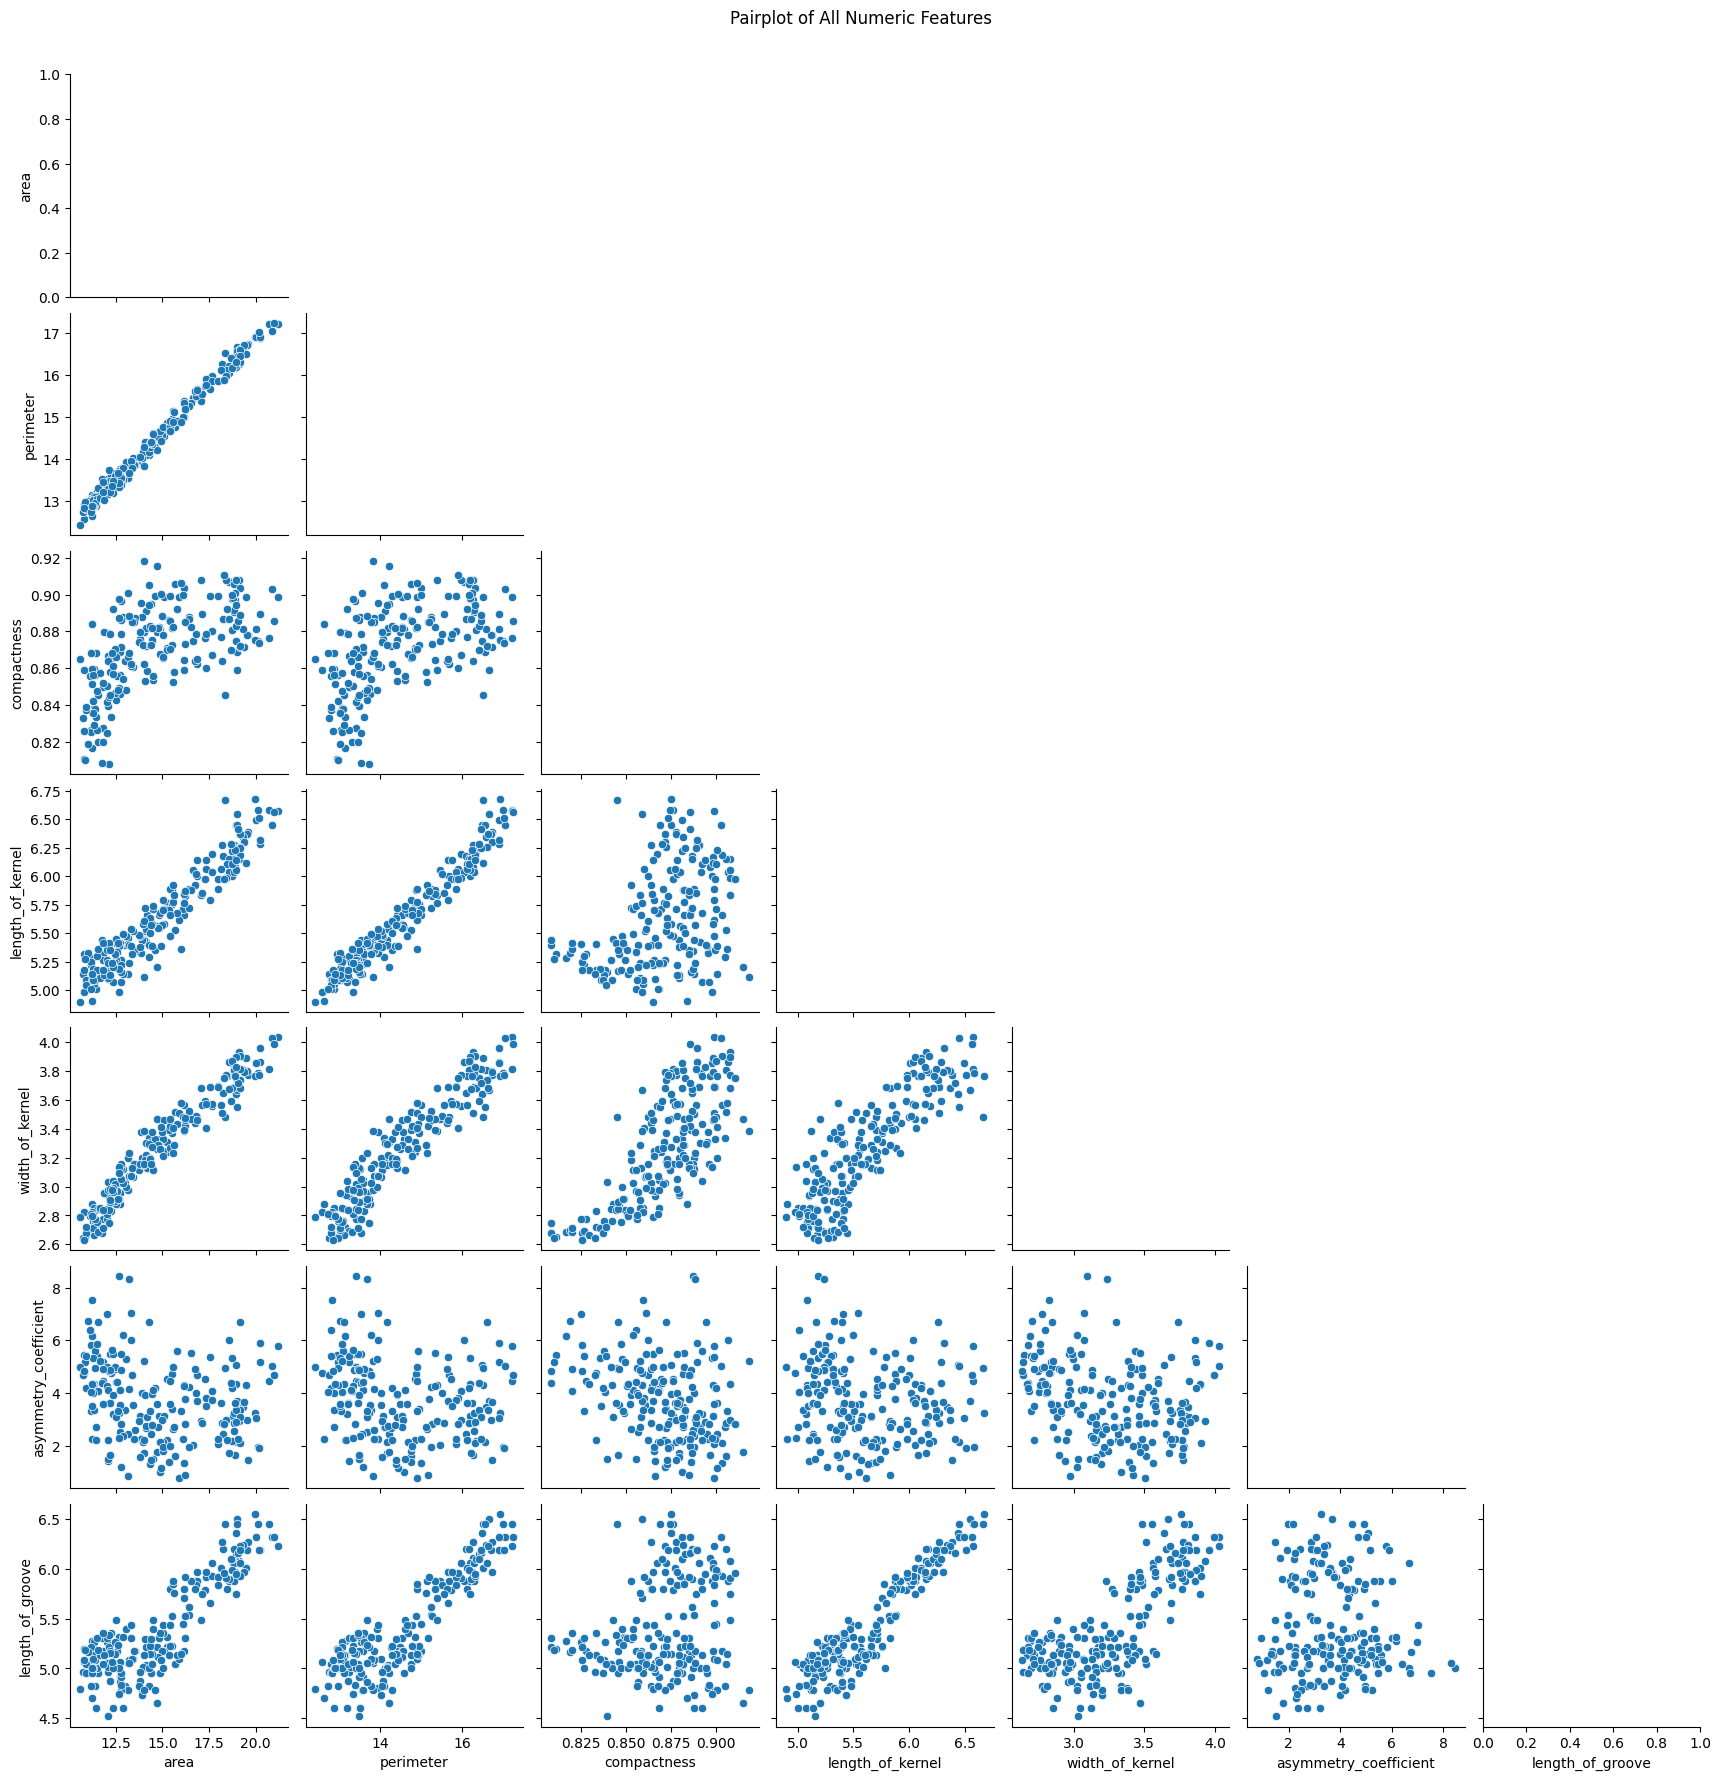

In [48]:
# Generate the pairplot for all numeric combinations
sns.pairplot(df, diag_kind='scatter', corner=True)
plt.suptitle("Pairplot of All Numeric Features", y=1.02)
plt.show()

##### Create a pairplot with assigned clustered

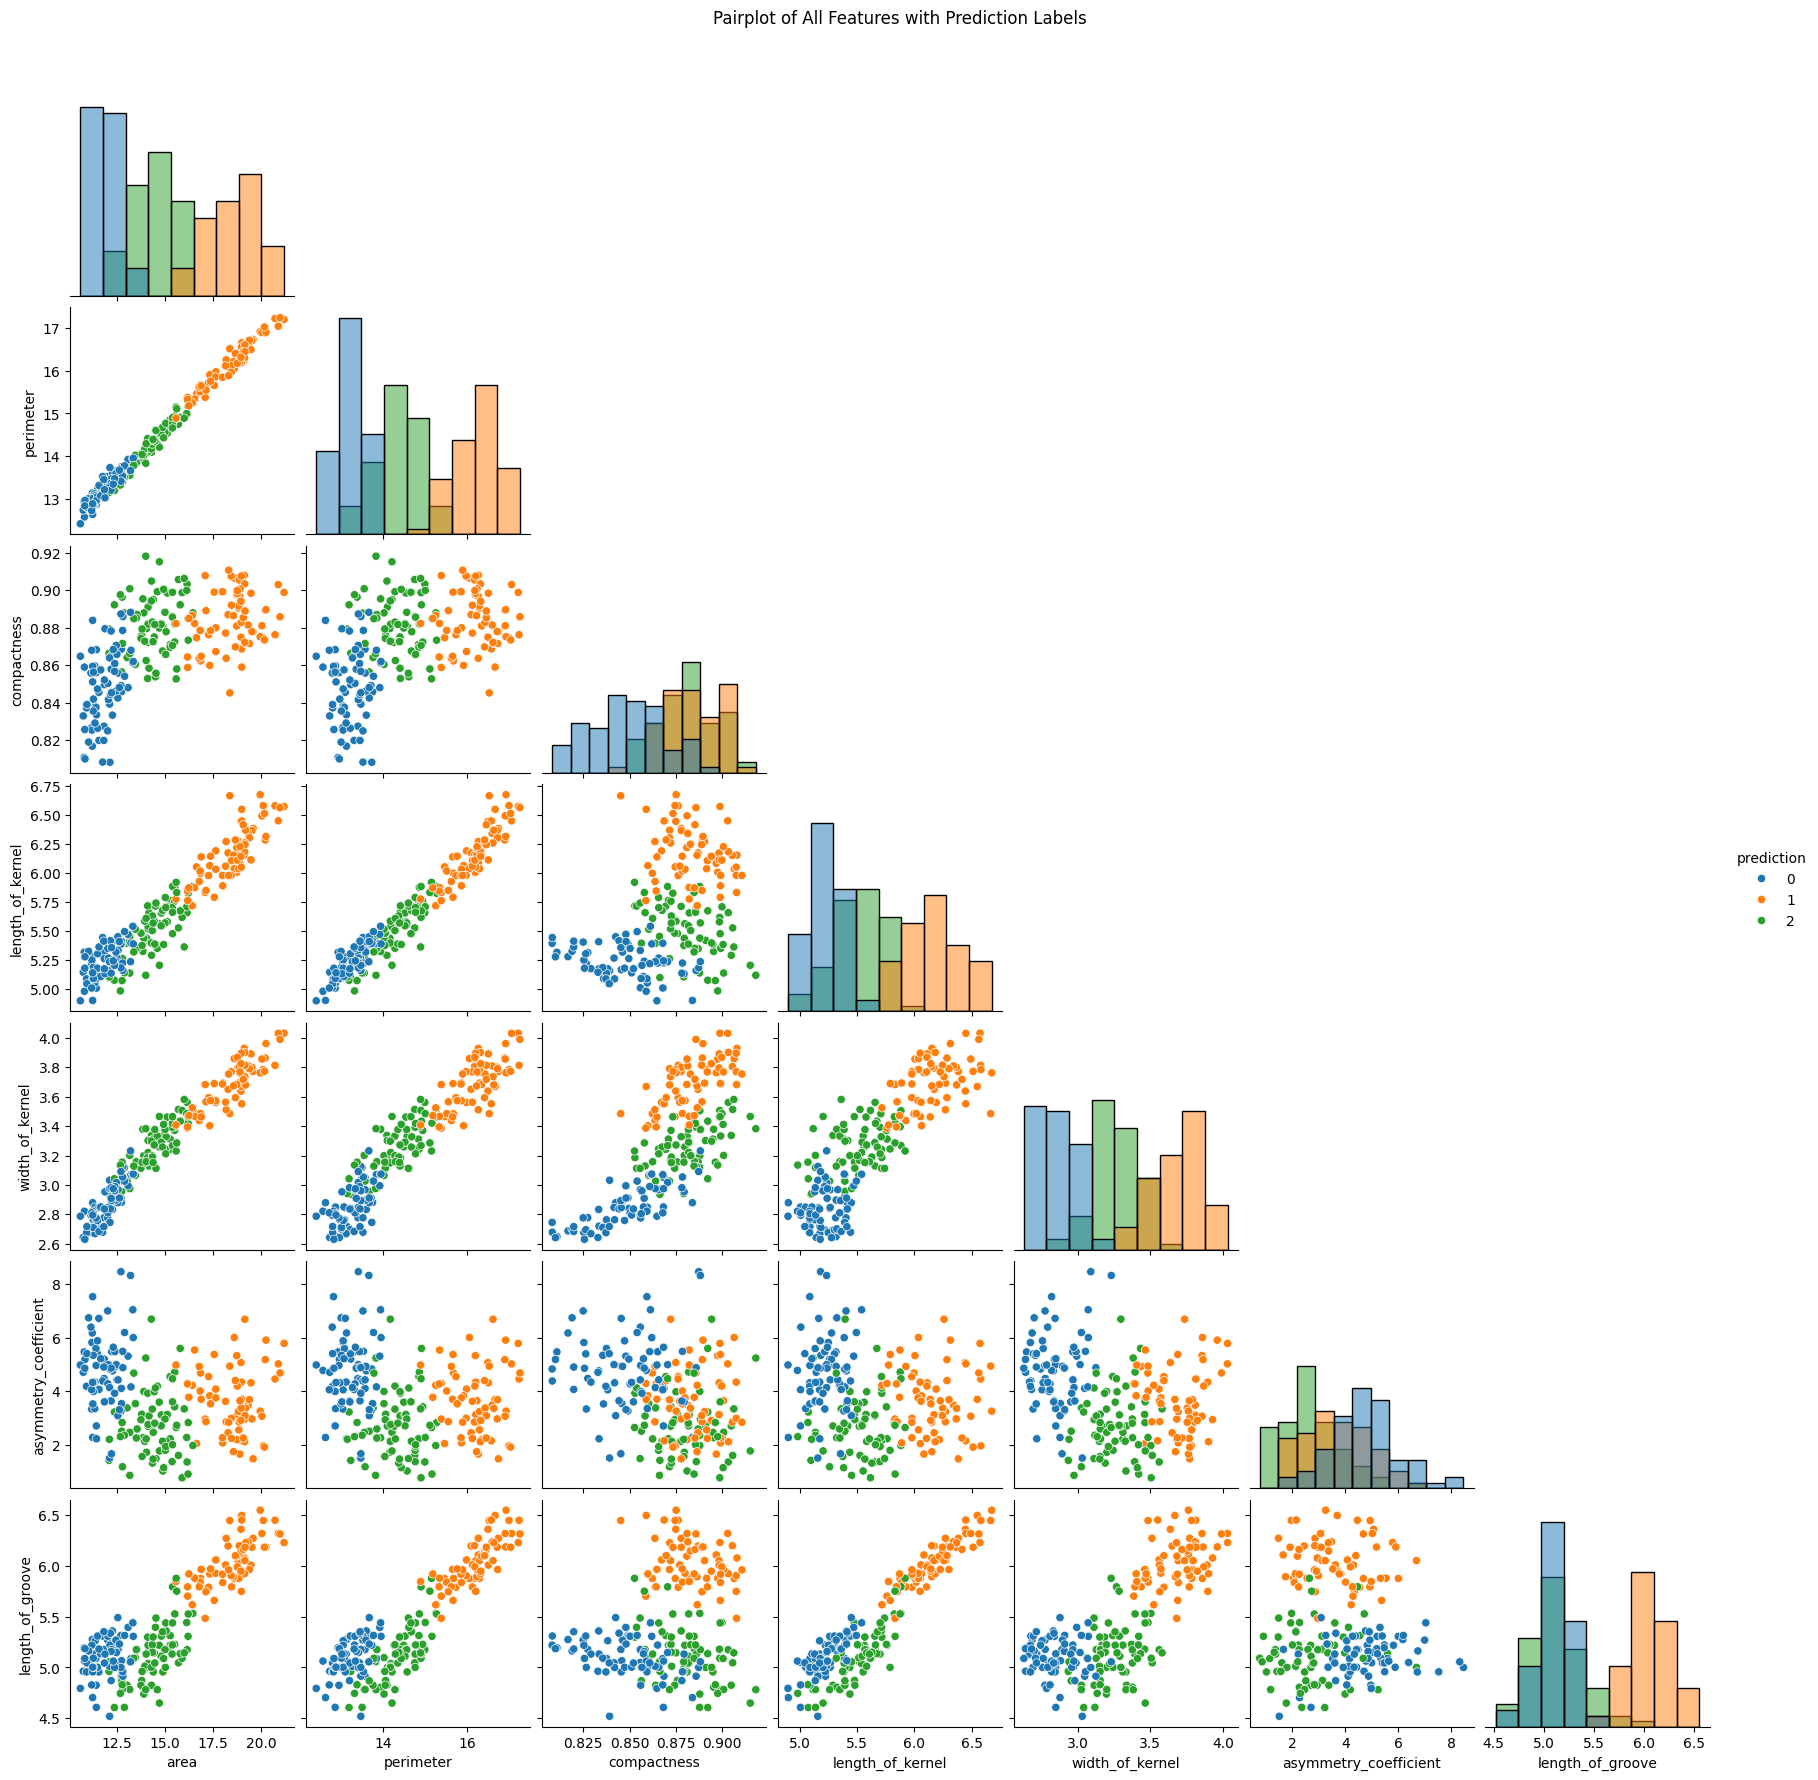

In [49]:
predicted_df_cleaned = predicted_df.toPandas()
# Define a more distinct color palette for each cluster
palette = sns.color_palette("tab10", n_colors=len(predicted_df_cleaned['prediction'].unique()))
# Visualize pairplot for all feature combinations with 'prediction' as hue
sns.pairplot(predicted_df_cleaned, diag_kind='hist', hue='prediction', palette=palette, corner=True)
plt.suptitle("Pairplot of All Features with Prediction Labels", y=1.02)
plt.show()